Nendoroids are a brand of action figures or shrines owned by the Good Smile Company. They are usually short in size or chibi-sized and cover a lot of characters from all sorts of medium such as movies, games TV shows, animations,books etc. They are very popular among the anime and manga fandom due to most of their figures being based on most popular anime/manga/light novels. They consist of around 30-40 movable parts and some of them are known to be hand-made to this day. If you want to know more about their production, I recommend watching this 30 min video of how they are made https://www.youtube.com/watchtime_continue=1397&v=JFCPqLmJraI&feature=emb_title

In this blog, we're going to classify pics of Nendoroids with other action figure brands such as Figmas, Gunplas etc. using machine and deep learning. I'll try my best to explain these concepts in layman terms. The reason for doing so is that making image classification project using cats,dogs,fruits doesn't sound so exciting.

Collecting the images was sort of easy. I downloaded (manually or through a script or software) the Nendoroid and Non-nendoroid images from Google Images, Pinterest and online stores that are catered to selling this sort of stuff and place it into their respective folders (Nendoroid and non-Nendoroids). There's no set amount for the number of images in a dataset, but the rule of thumb is around a total of 1000 images. 

One thing that I had to keep in mind is that the images only contained one or 2 figures and are facing towards the camera. 

For labelling, I renamed the file names in both folder to something like nendo_(insert number) and nonendo_(insert number) using the Python OS library. A much better way to label the images is using an annotator like Pidgeon (https://github.com/agermanidis/pigeon) thanks to this blog on collecting images for the dataset. 

In [1]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as pypl
import os
import math
from random import shuffle

Before we get into preprocessing the data, we need to understand what an image consists of. A digital image consists of pixels which are arranged in a given length and width. 

Example of this would be an image of a resolution of 1920 x 1080. This contains 816,000 pixels, where the pixels are arranged within the length of 1920 pixels horizontally and 1080 pixels vertically.

Exery pixel contains a value. For grayscaled images, those values range between 0(black) to 255(white) and each of them represent the different shades of the 2 colors. 

What gives the color to an image is the RGB (Red,Green,Blue) channels. These channels consists of their own pixel value from 0 to 255, each representing a different shade of that color channel. The pixel value of that color image is a vector of all 
the 3 pixel values from each channel.

In [2]:
img_size = 256

For preprocessing our data, there are 3 steps to be followed : 

1. Read our image and convert it to greyscale. This is because we are more focused on the structures of the 
    figures and not the color.
2. Resize it to a certain resolution because all the images must have a uniform resolution size.
3. Convert the image to an n-dimensional array and flatten it to 1-dimension (you'll see that your dataframe will have   waaaaaaaay too many columns.

Do that for both image classes, append the labels and we have our dataset to chug our model on.

In [3]:
os.chdir(r'D:\Python\Python-Projects\Medium stuff\Nendoroid_vs_Funko\Nendo_vs_Funko\Nendoroid')

files = os.listdir()

In [4]:
import cv2
import pandas as pd 

data = []
# y = []

for i in files:
    
    #Read and convert the images to greyscale
    ig = cv2.imread(os.path.join(os.getcwd(),i),cv2.IMREAD_GRAYSCALE)
    
    #Resize the image to a uniform dimension
    new_ig = cv2.resize(ig,dsize=(img_size,img_size))
    
    #append converted data to label
    data.append([new_ig,'Nendoroid'])

In [5]:
os.chdir(r'D:\Python\Python-Projects\Medium stuff\Nendoroid_vs_Funko\Nendo_vs_Funko\Not_Nendoroids')

files = os.listdir()

In [6]:
for i in files:
    
    ig = cv2.imread(os.path.join(os.getcwd(),i),cv2.IMREAD_GRAYSCALE)
    
    new_ig = cv2.resize(ig,dsize=(img_size,img_size))
    
    data.append([new_ig,'Not_Nendo'])

In [7]:
data = np.array(data)

In [8]:
x = []
y = []

for feature,value in data:
    x.append(feature)
    if value == 'Nendoroid':
        y.append(1)
    else:
        y.append(0)

In [9]:
import seaborn as sd

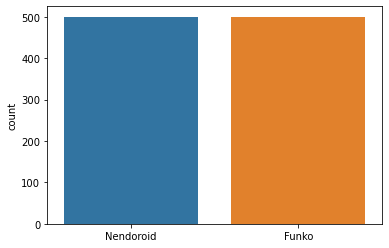

In [10]:
l = []

for i in data:
    if i[1] == 'Nendoroid':
        l.append('Nendoroid')
    else :
        l.append('Funko')

sd.countplot(l)

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

First thing is to normalize our images by dividing it with the value 255,which is the highest number that represents a shade of color from 0-255. The reason for doing so is that improve our CNN model during classification since the values will be at a range between 0-1.

In [13]:
x_train = np.array(x_train)/255
x_test = np.array(x_test)/255
x_val = np.array(x_val)/255

Next is to resize them back to their image size and send it as input to the CNN

In [14]:
x_train = x_train.reshape(-1,img_size,img_size,1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,1)
y_test = np.array(y_test)

x_val = x_val.reshape(-1,img_size,img_size,1)
y_val = np.array(y_val)

# Time for deep learning

To put it simply, the convolutional neural network involes breaking down the images into the smallest representation, before it is sent as input to the neural networks. How it breaks down the image ? It goes like this.

1. A matrix of a given dimension aka a kernel goes through the image step by step from up to down, left to right and multiplies. The result is a value that represents that kernel at that position. This is known as a convolution. 
2. How many steps it needs to take is determined by a value called stride. 
3. That convoluted matrix then gets broken down even further through a process called pooling, which is similar to convolution but it returns a matrix containing the max or average value of that kernel in the pooling phase.
4. This goes on until it returns the smallest possible dimensions.

How does the CNN find out any patterns and classify the images ? 

In the convolution layer, there exists filters, which are a bunch of weights as a vector. During the training of the model, it multiplies with the output of the convolution layer and as it goes through all the images, the weights keep on changing. When the model predicts an image, if the image has a very similar pattern to one of the images in the training dataset, those weights return high values as if it has already noticed that pattern. 

Now it's time to build the convolutional Neural Network using Keras via Tensorflow. Start by calling the Sequential() method to stack our layers and then add the convolutional layer (Conv2D) with a given number of nodes and the size of the kernel to use. After that add a max pooling layer of a given kernel size and keep on doing this until the dimension of the images through the layers are near zero or one. Once that's done, the images are flattened to a 1 dimensional array and it goes through the dense neural network at the last stages.

Activation functions are what converts the output of one node to be sent as input to the corresponding node. Except the last layer, the ReLu activation function is used since it takes less resources and it doesn't fall victim to the 'vanishing gradient' problem,unlike the Sigmoid function.

The last layer has 'Sigmoid' as the activation function and it outputs a value between 0 to 1. Dropouts are added to lessen the chances of overfitting the model. Here's a visual representation of the Dropout process.

In [15]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,1)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.1))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.1))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.1))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.1))
cnn.add(Conv2D(128,(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.1))
cnn.add(Conv2D(128,(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.1))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

In [16]:
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(1,activation='sigmoid'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

For compiling the neural network, the optimizer (which changes the weights and biases in the NN at a given learning rate) chosen is the RMSprop, the loss function is binary crossentropy because we have only 2 classes to classify from. The CNN is trained for about 35 rounds or epochs, with the validation data used to make sure that the CNN isn't 'memorizing' anything and can classify unseen data well.

In [17]:
cnn.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = cnn.fit(x_train,y_train,epochs=35,validation_data=(x_val,y_val))

Train on 640 samples, validate on 160 samples
Epoch 1/35
640/640 [==============================] - 35s 55ms/sample - loss: 0.7047 - accuracy: 0.4766 - val_loss: 0.7848 - val_accuracy: 0.4812
Epoch 2/35
640/640 [==============================] - 35s 54ms/sample - loss: 0.6912 - accuracy: 0.5813 - val_loss: 0.6299 - val_accuracy: 0.6313
Epoch 3/35
640/640 [==============================] - 35s 55ms/sample - loss: 0.5741 - accuracy: 0.7297 - val_loss: 0.6008 - val_accuracy: 0.7750
Epoch 4/35
640/640 [==============================] - 36s 56ms/sample - loss: 0.5328 - accuracy: 0.8000 - val_loss: 0.5175 - val_accuracy: 0.7688
Epoch 5/35
640/640 [==============================] - 36s 56ms/sample - loss: 0.3966 - accuracy: 0.8438 - val_loss: 0.5600 - val_accuracy: 0.7000
Epoch 6/35
640/640 [==============================] - 36s 55ms/sample - loss: 0.3804 - accuracy: 0.8375 - val_loss: 0.4592 - val_accuracy: 0.7812
Epoch 7/35
640/640 [==============================] - 36s 55ms/sample - loss: 

Comparing the accuracy values of both the training and validation data for 20 epochs and the test data accuracy, there seems to be slight overfitting. This can be changed through trial and error by changing the learning rate, dropout value, removing layers etc. but I'll stop it from here.

160/160 - 2s - loss: 0.7991 - accuracy: 0.8687
Validation accuracy : 0.8687499761581421 

200/200 - 2s - loss: 0.2749 - accuracy: 0.9200
Test accuracy : 0.9200000166893005


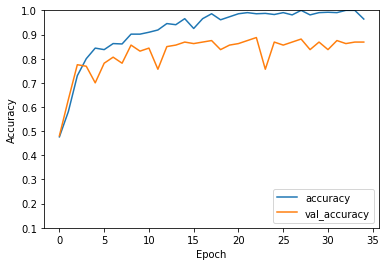

In [31]:
pypl.plot(history.history['accuracy'], label='accuracy')
pypl.plot(history.history['val_accuracy'], label = 'val_accuracy')
pypl.xlabel('Epoch')
pypl.ylabel('Accuracy')
pypl.ylim([0.1, 1])
pypl.legend(loc='lower right')


val_loss, val_acc = cnn.evaluate(x_val,  y_val, verbose=2)
print(f"Validation accuracy : {val_acc} \n")

test_loss, test_acc = cnn.evaluate(x_test,  y_test, verbose=2)
print(f"Test accuracy : {test_acc}")

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

pred = cnn.predict_classes(x_test)
pred = pred.reshape(-1,1)
accuracy_score(y_test, pred)

0.92

Looking at the confusion matrix for the test data, the model did it's job of classifying the test data quite well, albeit some false negatives. 

Text(32.99999999999999, 0.5, 'Predicted values')

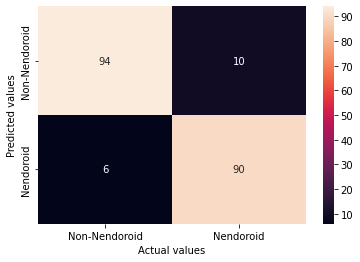

In [59]:
import seaborn as sd

test_conf = confusion_matrix(y_test, pred)

ax = sd.heatmap(pd.DataFrame(test_conf,columns=['Non-Nendoroid','Nendoroid'],index=['Non-Nendoroid','Nendoroid']),\
           annot=True)
ax.set_yticklabels(['Non-Nendoroid','Nendoroid'], va='center')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')

Now for the moment of truth. It's time to use our classifier against images outside of the dataset we used. What's a classifier if it doesn't classify anything outside of the used dataset ?. There are 40 images (20 Nendoroid and non-Nendoroid images) in this set and we're going to see how well it was able to classify our images.

Like before, we preprocess the images and then use the predict_classes() function to predict the class for each image.

In [61]:
os.chdir(r'D:\Python\Python-Projects\Medium stuff\Nendoroid_vs_Funko\Nendo_vs_Funko\Test data')

files = os.listdir()

In [62]:
x = []
y = []

for i in files:
    
    ig = cv2.imread(os.path.join(os.getcwd(),i),cv2.IMREAD_GRAYSCALE)
    
    new_ig = cv2.resize(ig,dsize=(img_size,img_size))
    
    x.append(new_ig)
    
    if i[1:6] == 'nendo':
        y.append(1)
    else :
        y.append(0)
    
y = np.array(y)

x = np.array(x)/255
x = x.reshape(-1,img_size,img_size,1)    

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score

pred = cnn.predict_classes(x)

Looking at the accuracy and the confusion matrix, there are a lot less false positives and false negatives found, so I'd say it did it's job.

Text(32.99999999999999, 0.5, 'Predicted values')

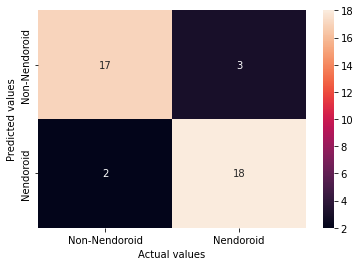

In [64]:
conf = confusion_matrix(y, pred)

ax = sd.heatmap(pd.DataFrame(conf,columns=['Non-Nendoroid','Nendoroid'],index=['Non-Nendoroid','Nendoroid']),\
           annot=True)
ax.set_yticklabels(['Non-Nendoroid','Nendoroid'], va='center')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')

In [25]:
accuracy_score(y, pred)

0.875

In [26]:
pred = pred.reshape(1,-1)[0]

correct = np.nonzero(pred==y)[0]
correct_total = conf[0,0] + conf[1,1]

not_correct = np.nonzero(pred!=y)[0]
not_correct_total = conf[0,1] + conf[1,0]

Here are some of the images classified correctly and not correctly classified (0 indicated it's not a Nendoroid and 1 indicates it is a Nendoroid). 

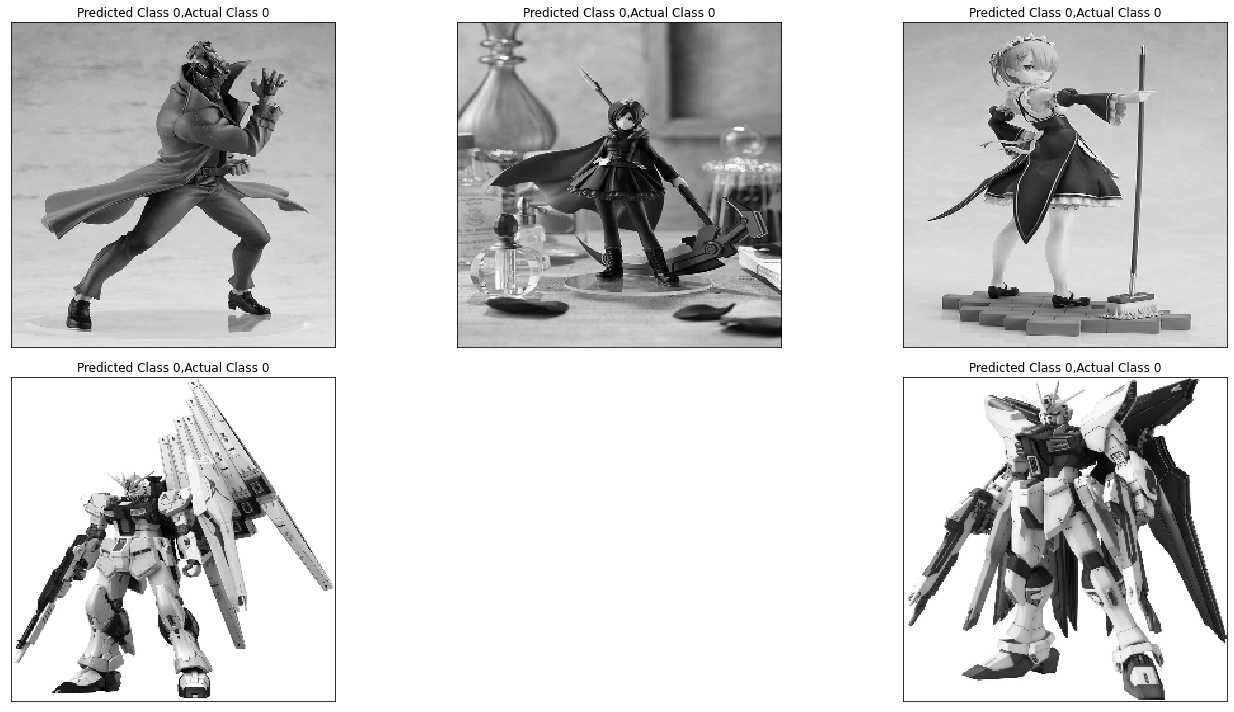

In [27]:
pypl.figure(figsize=(20,10))

i=0

for c in correct[:6]:

    pypl.subplot(2,3,i+1)
    pypl.xticks([])
    pypl.yticks([])
    pypl.imshow(x[c].reshape(img_size,img_size),cmap='gray',interpolation='none')
    pypl.title("Predicted Class {},Actual Class {}".format(pred[c], y[c]))
    pypl.tight_layout()
    i+=1

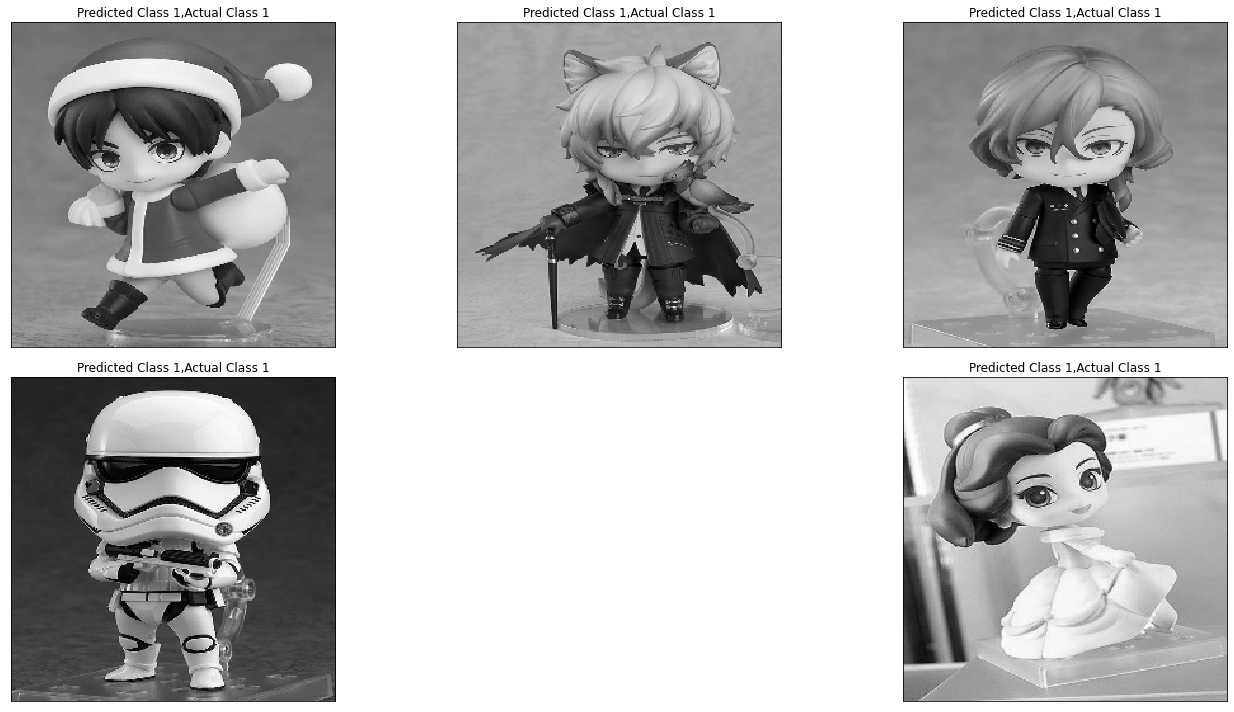

In [28]:
pypl.figure(figsize=(20,10))

i=0

for c in correct[correct_total-10:correct_total-4]:

    pypl.subplot(2,3,i+1)
    pypl.xticks([])
    pypl.yticks([])
    pypl.imshow(x[c].reshape(img_size,img_size),cmap='gray',interpolation='none')
    pypl.title("Predicted Class {},Actual Class {}".format(pred[c], y[c]))
    pypl.tight_layout()
    i+=1

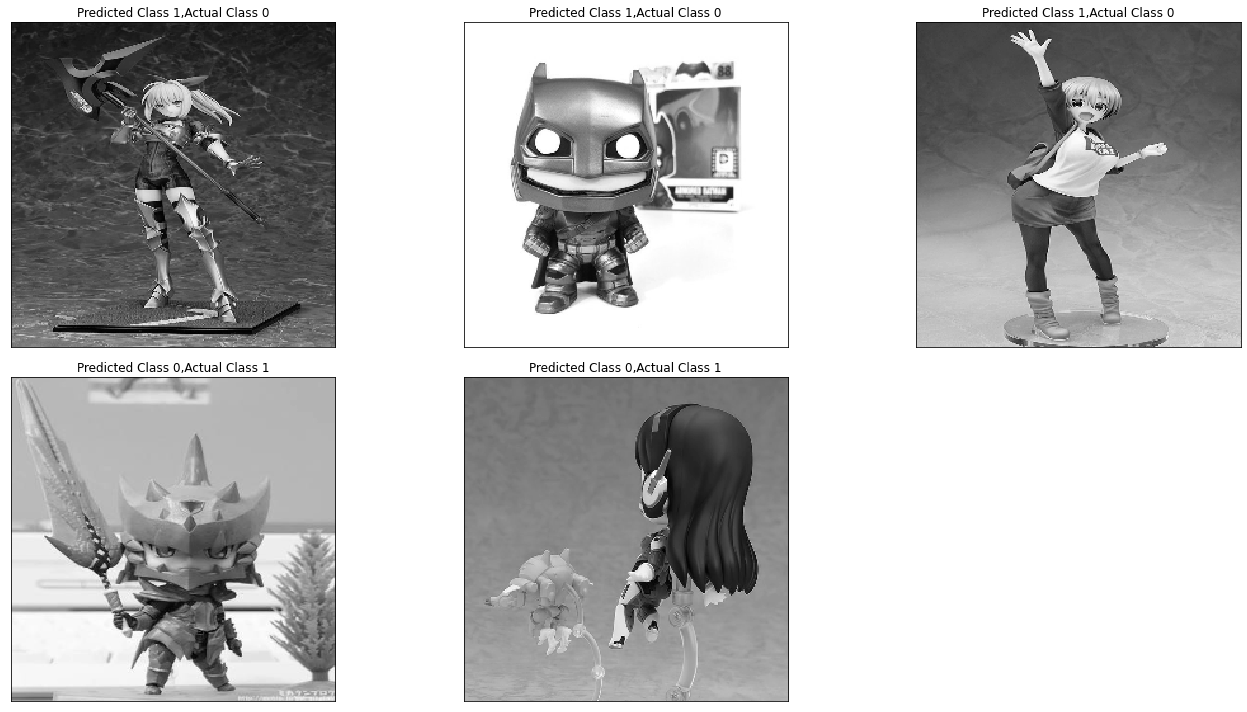

In [29]:
import matplotlib.pyplot as pypl

i=0 

pypl.figure(figsize=(20,10))

for c in not_correct[:6]:
    pypl.subplot(2,3,i+1)
    pypl.xticks([])
    pypl.yticks([])
    pypl.imshow(x[c].reshape(img_size,img_size),cmap='gray',interpolation='none')
    pypl.title("Predicted Class {},Actual Class {}".format(pred[c], y[c]))
    pypl.tight_layout()
    i+=1

In short, we were able to make a classifier that was able to differentiate and classify between Nendoroids and Non-nendoroid images using a Convolutional Neural Network. Even though this could have been done better with some slight tuning and modifications, we now know that it was effective in doing so. Overall, this was a fun experiment to learn about image preprocessing and classification as well as the inner workings of the Convolutional Neural Network. Here's a reward for going through this (https://www.youtube.com/watch?v=ZMu2MAvwMfk)

If you like this article, please share it with others and don't forget to leave some claps. I'll be greatful if you do so. Feel free to give feedback about this and the notebook and dataset for this project will be on my Github. 